# **PCA -- short and long sleeping time**

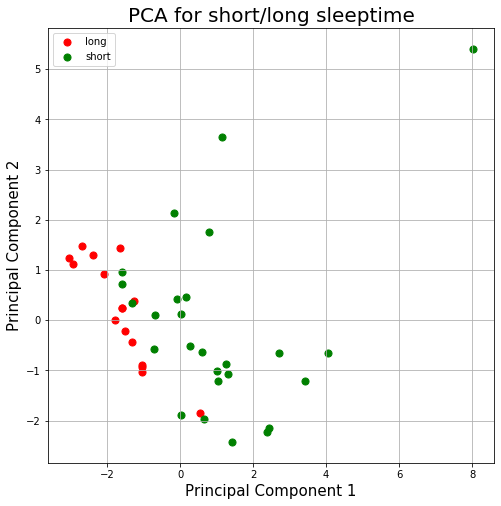

variance of the 2 most important components:  [0.48909458 0.2609859 ]


In [38]:
import pandas as pd

# Load data from csv file
raw_df = pd.read_excel(r"C:\Users\mama\OneDrive - HKUST Connect\UST\Study\Year 2 sem 2\CSIC 5011\sleep_filtered.xlsx")

# divide into short vs long lifetime
raw_df['sleeptime'] = 'no'
raw_df.loc[raw_df['sleep']>=12,'sleeptime'], raw_df.loc[(raw_df['sleep']<12),'sleeptime'] = 'long', 'short'

x, y = raw_df.drop(['species','sleep','sleeptime'],1), raw_df['sleeptime']

Feature_list, Target_name = x.columns, 'sleep'

# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

# plotting the result graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA for short/long sleeptime', fontsize = 20)
targets = ['long', 'short']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sleeptime'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

print('variance of the 2 most important components: ',pca.explained_variance_ratio_)

## Logistics Regression result with more components

In [40]:
from sklearn.model_selection import train_test_split
# split into 70% train set and 30% test set
x, y = raw_df.drop(['species','sleep','sleeptime'],1), raw_df['sleeptime']
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
train_x = StandardScaler().fit_transform(train_x)
test_x = StandardScaler().fit_transform(test_x)

# Use only all components by PCA
from sklearn.decomposition import PCA
pca = PCA(7)
pca.fit(train_x)

train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

# Fit data by Logistics Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_x, train_y)

# Prediction
logisticRegr.predict(test_x)
R2_score = logisticRegr.score(test_x, test_y)

print("R2_score with 7 components: ",R2_score)

R2_score with 7 components:  0.9230769230769231


## Logistics Regression result with less components

In [41]:
from sklearn.model_selection import train_test_split
# split into 70% train set and 30% test set
x, y = raw_df.drop(['species','sleep','sleeptime'],1), raw_df['sleeptime']
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
train_x = StandardScaler().fit_transform(train_x)
test_x = StandardScaler().fit_transform(test_x)

# Use only 2 components by PCA
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(train_x)

train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

# Fit data by Logistics Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_x, train_y)

# Prediction
logisticRegr.predict(test_x)
R2_score = logisticRegr.score(test_x, test_y)

print("R2_score with 2 components: ",R2_score)

R2_score with 2 components:  0.9230769230769231


# **PCA -- short and long lifetime**

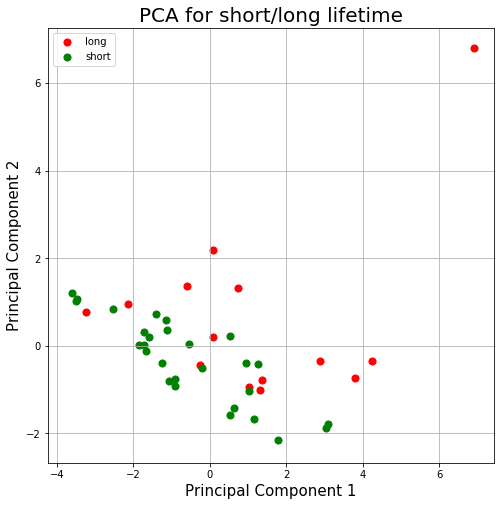

variance of the 2 most important components:  [0.54043125 0.23200619]


In [44]:
import pandas as pd

# Load data from csv file
raw_df = pd.read_excel(r"C:\Users\mama\OneDrive - HKUST Connect\UST\Study\Year 2 sem 2\CSIC 5011\sleep_filtered.xlsx")

# divide into short vs long lifetime
raw_df['lifetime'] = 'no'
raw_df.loc[raw_df['life']>=23,'lifetime'], raw_df.loc[(raw_df['life']<23),'lifetime'] = 'long', 'short'

x, y = raw_df.drop(['species','life','lifetime'],1), raw_df['lifetime']

Feature_list, Target_name = x.columns, 'life'

# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

# plotting the result graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA for short/long lifetime', fontsize = 20)
targets = ['long', 'short']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['lifetime'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

print('variance of the 2 most important components: ',pca.explained_variance_ratio_)

## Logistics Regression result with more components

In [50]:
from sklearn.model_selection import train_test_split
# split into 70% train set and 30% test set
x, y = raw_df.drop(['species','life','lifetime'],1), raw_df['lifetime']
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
train_x = StandardScaler().fit_transform(train_x)
test_x = StandardScaler().fit_transform(test_x)

# Use only all components by PCA
from sklearn.decomposition import PCA
pca = PCA(7)
pca.fit(train_x)

train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

# Fit data by Logistics Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_x, train_y)

# Prediction
logisticRegr.predict(test_x)
R2_score = logisticRegr.score(test_x, test_y)

print("R2_score with 7 components: ",R2_score)

R2_score with 7 components:  0.6923076923076923


## Logistics Regression result with less components

In [54]:
from sklearn.model_selection import train_test_split
# split into 70% train set and 30% test set
x, y = raw_df.drop(['species','life','lifetime'],1), raw_df['lifetime']
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
train_x = StandardScaler().fit_transform(train_x)
test_x = StandardScaler().fit_transform(test_x)

# Use only 2 components by PCA
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(train_x)

train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

# Fit data by Logistics Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_x, train_y)

# Prediction
logisticRegr.predict(test_x)
R2_score = logisticRegr.score(test_x, test_y)

print("R2_score with 2 components: ",R2_score)

R2_score with 2 components:  0.6923076923076923
